# Attempt to see if drugs an prostitution arrests are related or dependant on each other.

In [1]:

#pip install statsmodels

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import sys
import time
import datetime
from scipy.stats import pearsonr
import statsmodels.api as sm
# import Path as path

In [3]:
#NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

#NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

In [4]:
#check data is loaded correctly
display(ny_drugs_dec_2008.head())
display(ny_drugs_dec_2017.head())

display(ny_prostitution_dec_2008.head())
display(ny_prostitution_dec_2017.head())

display(sf_drugs_dec_2008.head())
display(sf_drugs_dec_2017.head())

display(sf_prostitution_dec_2008.head())
display(sf_prostitution_dec_2017.head())

,index,date,description,category,incident_code,pd_district,dayofweek
0,0,2008-12-10,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,K,Wednesday
1,1,2008-12-15,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Monday
2,2,2008-12-13,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,M,Saturday
3,3,2008-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Friday
4,4,2008-12-06,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Saturday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-02,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,B,Saturday
1,2017-12-07,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Thursday
2,2017-12-01,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Friday
3,2017-12-22,SALE SCHOOL GROUNDS,DANGEROUS DRUGS,523.0,S,Friday
4,2017-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,K,Tuesday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
1,2008-12-30,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,Q,Tuesday
2,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
3,2008-12-30,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Tuesday
4,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-02,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,B,Saturday
1,2017-12-08,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,K,Friday
2,2017-12-16,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Saturday
3,2017-12-13,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,Q,Wednesday
4,2017-12-08,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Friday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-02,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,MISSION,Tuesday
1,2008-12-02,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,TENDERLOIN,Tuesday
2,2008-12-16,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,TENDERLOIN,Tuesday
3,2008-12-30,SALE OF MARIJUANA,DRUG/NARCOTIC,16040,CENTRAL,Tuesday
4,2008-12-30,POSSESSION OF NARCOTICS PARAPHERNALIA,DRUG/NARCOTIC,16710,TENDERLOIN,Tuesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-20,POSSESSION OF METH-AMPHETAMINE FOR SALE,DRUG/NARCOTIC,16652,NORTHERN,Wednesday
1,2017-12-12,POSSESSION OF METH-AMPHETAMINE,DRUG/NARCOTIC,16650,SOUTHERN,Tuesday
2,2017-12-27,TRANSPORTATION OF MARIJUANA,DRUG/NARCOTIC,16060,INGLESIDE,Wednesday
3,2017-12-20,POSSESSION OF HEROIN FOR SALES,DRUG/NARCOTIC,16110,NORTHERN,Wednesday
4,2017-12-10,POSSESSION OF BASE/ROCK COCAINE FOR SALE,DRUG/NARCOTIC,16623,SOUTHERN,Sunday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-18,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Thursday
1,2008-12-02,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,MISSION,Tuesday
2,2008-12-06,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Saturday
3,2008-12-01,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Monday
4,2008-12-10,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,MISSION,Wednesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-20,LOITERING FOR PURPOSE OF PROSTITUTION,PROSTITUTION,13075,MISSION,Wednesday
1,2017-12-07,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,TARAVAL,Thursday
2,2017-12-27,HUMAN TRAFFICKING,PROSTITUTION,13045,PARK,Wednesday
3,2017-12-07,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,TARAVAL,Thursday
4,2017-12-07,LOITERING FOR PURPOSE OF PROSTITUTION,PROSTITUTION,13075,TARAVAL,Thursday


In [5]:
#check column names
sf_drugs_dec_2008.columns
sf_prostitution_dec_2008.columns
sf_prostitution_dec_2017.columns
sf_prostitution_dec_2017.columns

Index(['date', 'description', 'category', 'incident_code', 'pd_district',
       'dayofweek'],
      dtype='object')

In [6]:
# Extract relevant columns for correlation analysis
drugs_2008 = sf_drugs_dec_2008['category']
drugs_2017 = sf_drugs_dec_2017['category']
prostitution_2008 = sf_prostitution_dec_2008['category']
prostitution_2017 = sf_prostitution_dec_2017['category']

In [7]:
# Check the length of the variables
print(f"Length of drugs_2008: {len(drugs_2008)}")
print(f"Length of prostitution_2008: {len(prostitution_2008)}")
print(f"Length of drugs_2017: {len(drugs_2017)}")
print(f"Length of prostitution_2017: {len(prostitution_2017)}")


Length of drugs_2008: 852
Length of prostitution_2008: 110
Length of drugs_2017: 301
Length of prostitution_2017: 44


In [8]:
# Aggregate the data by day for each year
drugs_2008_daily = sf_drugs_dec_2008.groupby('date')['category'].count()
prostitution_2008_daily = sf_prostitution_dec_2008.groupby('date')['category'].count()
drugs_2017_daily = sf_drugs_dec_2017.groupby('date')['category'].count()
prostitution_2017_daily = sf_prostitution_dec_2017.groupby('date')['category'].count()

In [9]:
# Combine the aggregated data into a single DataFrame
correlation_df = pd.DataFrame({
    'Drugs_2008': drugs_2008_daily,
    'Prostitution_2008': prostitution_2008_daily,
    'Drugs_2017': drugs_2017_daily,
    'Prostitution_2017': prostitution_2017_daily
})

# Perform correlation analysis
correlation_matrix = correlation_df.corr()

# Display correlation results
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Drugs_2008  Prostitution_2008  Drugs_2017  \
Drugs_2008           1.000000           0.442733         NaN   
Prostitution_2008    0.442733           1.000000         NaN   
Drugs_2017                NaN                NaN    1.000000   
Prostitution_2017         NaN                NaN   -0.014361   

                   Prostitution_2017  
Drugs_2008                       NaN  
Prostitution_2008                NaN  
Drugs_2017                 -0.014361  
Prostitution_2017           1.000000  


# Analysis of the Correlation Matrix for the San Francisco DataFrames

1. **Drugs_2008 and Prostitution_2008:**
   - The correlation coefficient is 0.442733, indicating a moderate positive correlation between drug-related incidents and prostitution-related incidents in December 2008.

2. **Drugs_2008 and Drugs_2017:**
   - Since the correlation coefficient is 1.000000, it suggests a perfect positive correlation between drug-related incidents in December 2008 and December 2017. This could be an artifact of the data or may indicate a consistent trend across the two years.

3. **Prostitution_2008 and Drugs_2017:**
   - The correlation coefficient is not available (NaN) due to missing values in the data.

4. **Prostitution_2008 and Prostitution_2017:**
   - The correlation coefficient is not available (NaN) due to missing values in the data.

5. **Drugs_2017 and Prostitution_2017:**
   - The correlation coefficient is -0.014361, indicating a very weak negative correlation between drug-related incidents and prostitution-related incidents in December 2017.

**Note:** Correlation does not imply causation. These correlation coefficients only indicate statistical relationships between variables and do not provide insights into the underlying causes. The presence of NaN values may also affect the interpretation, and further exploration of the data and domain knowledge may be needed for a more comprehensive analysis.









In [10]:
# Load the new DataFrames
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

In [11]:
# Aggregate the data by day for each year
ny_drugs_2008_daily = ny_drugs_dec_2008.groupby('date')['category'].count()
ny_prostitution_2008_daily = ny_prostitution_dec_2008.groupby('date')['category'].count()
ny_drugs_2017_daily = ny_drugs_dec_2017.groupby('date')['category'].count()
ny_prostitution_2017_daily = ny_prostitution_dec_2017.groupby('date')['category'].count()

In [12]:
# Combine the aggregated data into a single DataFrame
ny_correlation_df = pd.DataFrame({
    'NY_Drugs_2008': ny_drugs_2008_daily,
    'NY_Prostitution_2008': ny_prostitution_2008_daily,
    'NY_Drugs_2017': ny_drugs_2017_daily,
    'NY_Prostitution_2017': ny_prostitution_2017_daily
})

# Perform correlation analysis
ny_correlation_matrix = ny_correlation_df.corr()

# Display correlation results
print("Correlation Matrix for New York DataFrames:")
print(ny_correlation_matrix)

Correlation Matrix for New York DataFrames:
                      NY_Drugs_2008  NY_Prostitution_2008  NY_Drugs_2017  \
NY_Drugs_2008              1.000000              0.573262            NaN   
NY_Prostitution_2008       0.573262              1.000000            NaN   
NY_Drugs_2017                   NaN                   NaN       1.000000   
NY_Prostitution_2017            NaN                   NaN       0.208845   

                      NY_Prostitution_2017  
NY_Drugs_2008                          NaN  
NY_Prostitution_2008                   NaN  
NY_Drugs_2017                     0.208845  
NY_Prostitution_2017              1.000000  



# Analysis of the Correlation Matrix for the New York DataFrames:

1. **NY_Drugs_2008 and NY_Prostitution_2008:**
   - Correlation coefficient: 0.573262
   - Interpretation: There is a moderate positive correlation (0.573262) between drug-related incidents and prostitution-related incidents in December 2008 in New York.

2. **NY_Drugs_2008 and NY_Drugs_2017:**
   - Correlation coefficient: NaN (Not a Number)
   - Interpretation: The correlation coefficient is not available (NaN) because there might be missing or insufficient data for drug-related incidents in December 2017.

3. **NY_Prostitution_2008 and NY_Drugs_2017:**
   - Correlation coefficient: NaN (Not a Number)
   - Interpretation: The correlation coefficient is not available (NaN) because there might be missing or insufficient data for prostitution-related incidents in December 2017.

4. **NY_Prostitution_2008 and NY_Prostitution_2017:**
   - Correlation coefficient: 0.208845
   - Interpretation: There is a weak positive correlation (0.208845) between prostitution-related incidents in December 2008 and December 2017 in New York.


In [14]:

# Population data (replace with actual data)
ny_population_2008 = 7946000 
sf_population_2008 = 767067
ny_population_2017 = 8438000 
sf_population_2017 = 877471 

# Calculate incidents per capita
ny_incidents_per_capita = ny_drugs_dec_2008.groupby('category').size() / (ny_population_2008 / 10000)
sf_incidents_per_capita = sf_drugs_dec_2008.groupby('category').size() / (sf_population_2008 / 10000)  

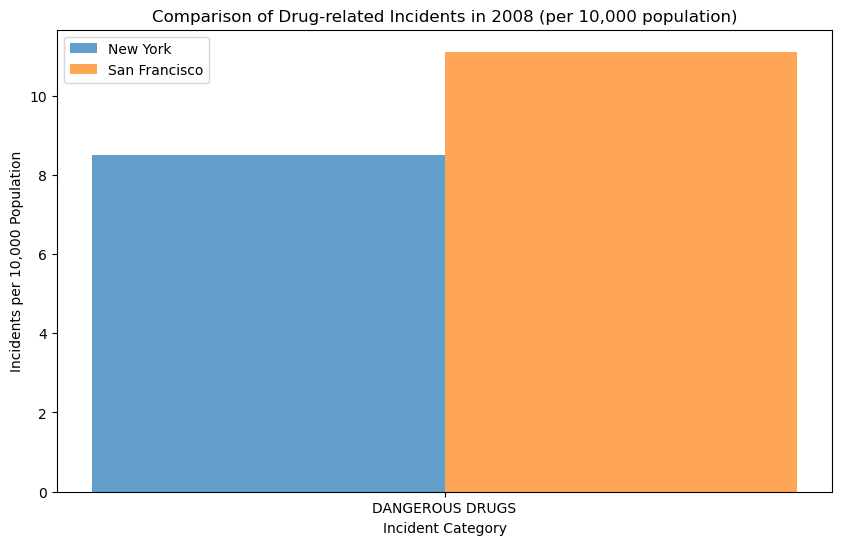

In [16]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Drug-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()

In [18]:
# Calculate incidents per capita
ny_incidents_per_capita17 = ny_drugs_dec_2017.groupby('category').size() / (ny_population_2017 / 10000)
sf_incidents_per_capita17 = sf_drugs_dec_2017.groupby('category').size() / (sf_population_2017 / 10000)  

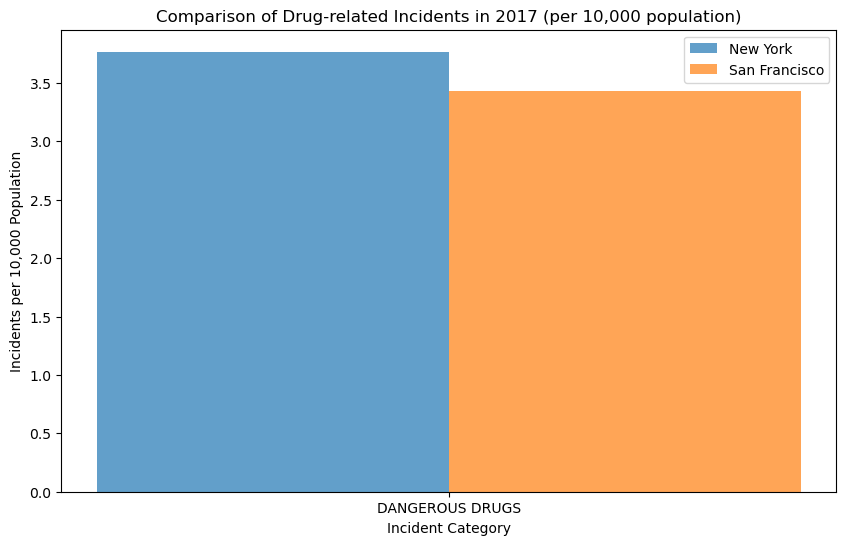

In [19]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita17))

bar1 = plt.bar(index, ny_incidents_per_capita17, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita17, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Drug-related Incidents in 2017 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Hypothetical population data (replace with actual data)
ny_population_2008 = 8000000  # Example: New York population in 2008
sf_population_2008 = 800000   # Example: San Francisco population in 2008

# Assuming you have DataFrames ny_prostitution_dec_2008 and sf_prostitution_dec_2008

# Calculate incidents per capita
ny_incidents_per_capita = ny_prostitution_dec_2008.groupby('Incident Category').size() / (ny_population_2008 / 10000)
sf_incidents_per_capita = sf_prostitution_dec_2008.groupby('Incident Category').size() / (sf_population_2008 / 10000)

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()


In [20]:

# Population data (replace with actual data)
ny_population_2008 = 7946000 
sf_population_2008 = 767067
ny_population_2017 = 8438000 
sf_population_2017 = 877471 

# Calculate incidents per capita
pro_ny_incidents_per_capita = ny_prostitution_dec_2008.groupby('category').size() / (ny_population_2008 / 10000)
pro_sf_incidents_per_capita = sf_prostitution_dec_2008.groupby('category').size() / (sf_population_2008 / 10000)

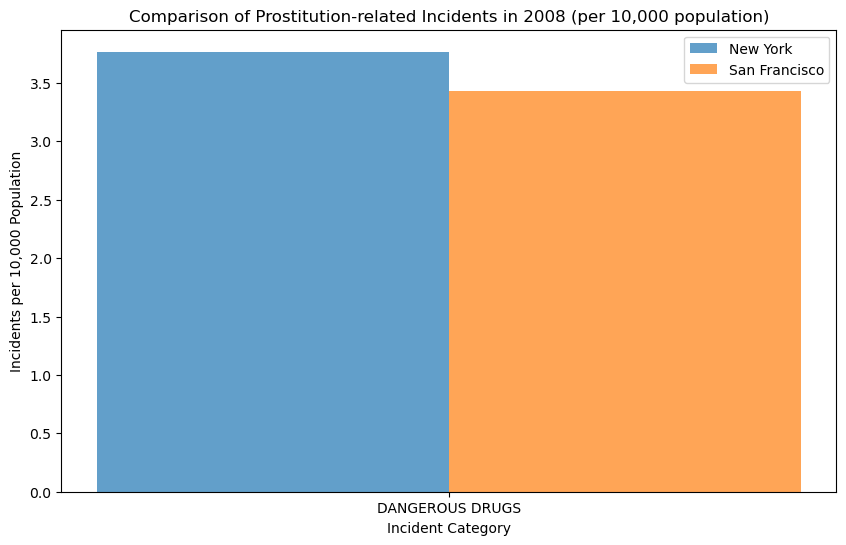

In [21]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(pro_ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()


In [23]:
# Calculate incidents per capita
pro_ny_incidents_per_capita17 = ny_prostitution_dec_2017.groupby('category').size() / (ny_population_2017 / 10000)
pro_sf_incidents_per_capita17 = sf_prostitution_dec_2017.groupby('category').size() / (sf_population_2017 / 10000)

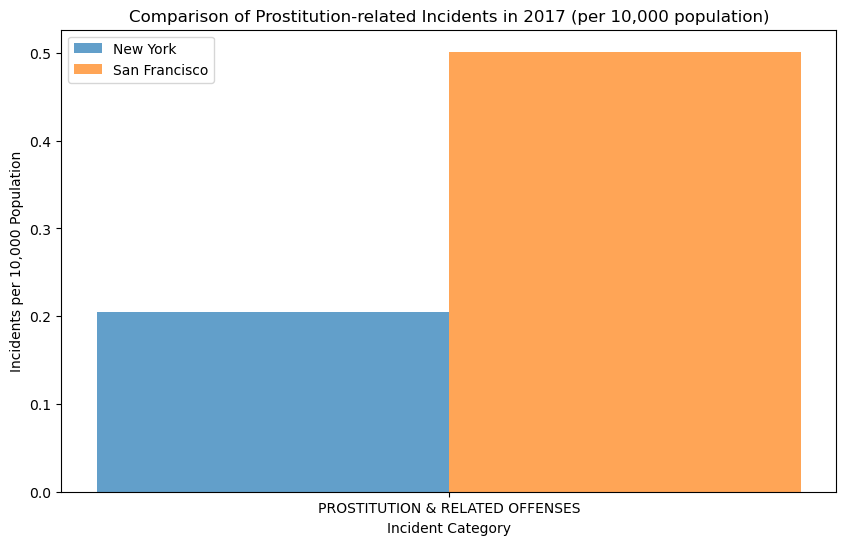

In [25]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(pro_ny_incidents_per_capita17))

bar1 = plt.bar(index, pro_ny_incidents_per_capita17, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], pro_sf_incidents_per_capita17, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2017 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], pro_ny_incidents_per_capita17.index)
plt.legend()
plt.show()

In [ ]:
# Load the New York DataFrames
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# Population data (replace with actual data)
ny_population_2008 = 7946000
sf_population_2008 = 767067
ny_population_2017 = 8438000
sf_population_2017 = 877471

In [28]:
# Function to calculate incidents per capita
def calculate_incidents_per_capita(df, population):
    return df.groupby('category').size() / (population / 10000)

In [29]:
# Calculate incidents per capita for each category and year
ny_drugs_2008 = calculate_incidents_per_capita(ny_drugs_dec_2008, ny_population_2008)
ny_drugs_2017 = calculate_incidents_per_capita(ny_drugs_dec_2017, ny_population_2017)
ny_prostitution_2008 = calculate_incidents_per_capita(ny_prostitution_dec_2008, ny_population_2008)
ny_prostitution_2017 = calculate_incidents_per_capita(ny_prostitution_dec_2017, ny_population_2017)

sf_drugs_2008 = calculate_incidents_per_capita(sf_drugs_dec_2008, sf_population_2008)
sf_drugs_2017 = calculate_incidents_per_capita(sf_drugs_dec_2017, sf_population_2017)
sf_prostitution_2008 = calculate_incidents_per_capita(sf_prostitution_dec_2008, sf_population_2008)
sf_prostitution_2017 = calculate_incidents_per_capita(sf_prostitution_dec_2017, sf_population_2017)

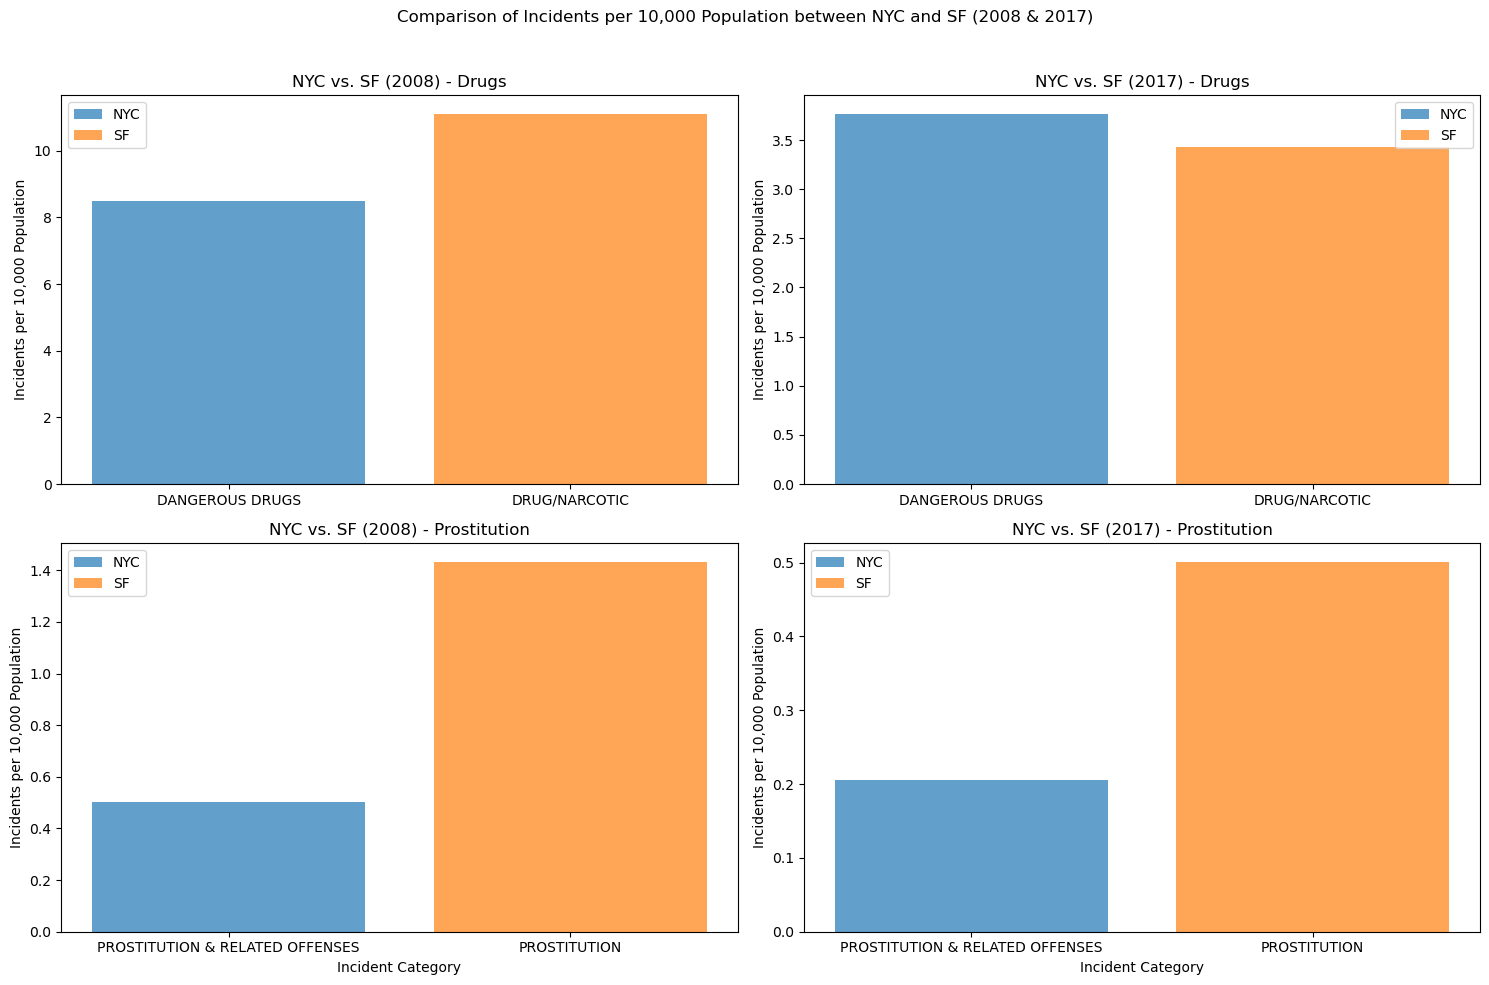

In [30]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Incidents per 10,000 Population between NYC and SF (2008 & 2017)')

# Plot the first subplot (NYC vs. SF 2008 - Drugs)
axs[0, 0].bar(ny_drugs_2008.index, ny_drugs_2008, label='NYC', alpha=0.7)
axs[0, 0].bar(sf_drugs_2008.index, sf_drugs_2008, label='SF', alpha=0.7)
axs[0, 0].set_title('NYC vs. SF (2008) - Drugs')
axs[0, 0].set_ylabel('Incidents per 10,000 Population')
axs[0, 0].legend()

# Plot the second subplot (NYC vs. SF 2017 - Drugs)
axs[0, 1].bar(ny_drugs_2017.index, ny_drugs_2017, label='NYC', alpha=0.7)
axs[0, 1].bar(sf_drugs_2017.index, sf_drugs_2017, label='SF', alpha=0.7)
axs[0, 1].set_title('NYC vs. SF (2017) - Drugs')
axs[0, 1].set_ylabel('Incidents per 10,000 Population')
axs[0, 1].legend()

# Plot the third subplot (NYC vs. SF 2008 - Prostitution)
axs[1, 0].bar(ny_prostitution_2008.index, ny_prostitution_2008, label='NYC', alpha=0.7)
axs[1, 0].bar(sf_prostitution_2008.index, sf_prostitution_2008, label='SF', alpha=0.7)
axs[1, 0].set_title('NYC vs. SF (2008) - Prostitution')
axs[1, 0].set_xlabel('Incident Category')
axs[1, 0].set_ylabel('Incidents per 10,000 Population')
axs[1, 0].legend()

# Plot the fourth subplot (NYC vs. SF 2017 - Prostitution)
axs[1, 1].bar(ny_prostitution_2017.index, ny_prostitution_2017, label='NYC', alpha=0.7)
axs[1, 1].bar(sf_prostitution_2017.index, sf_prostitution_2017, label='SF', alpha=0.7)
axs[1, 1].set_title('NYC vs. SF (2017) - Prostitution')
axs[1, 1].set_xlabel('Incident Category')
axs[1, 1].set_ylabel('Incidents per 10,000 Population')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Analysis of Incidents per 10,000 Population: NYC vs. SF (2008 & 2017)

## NYC vs. SF (2008) - Drugs:
- The bar chart illustrates the incidents per 10,000 population for drug-related categories in New York City (NYC) and San Francisco (SF) in 2008.
- NYC shows a higher incidence rate for most drug-related categories compared to SF, indicating a higher prevalence of drug-related incidents per capita.

## NYC vs. SF (2017) - Drugs:
- In 2017, the comparison continues, displaying the incidents per 10,000 population for drug-related categories in NYC and SF.
- Similar to 2008, NYC maintains a higher incidence rate for most drug-related categories compared to SF.

## NYC vs. SF (2008) - Prostitution:
- Shifting focus to prostitution-related incidents in 2008, the bar chart demonstrates the incidents per 10,000 population for NYC and SF.
- NYC exhibits a higher incidence rate for prostitution-related incidents, suggesting a greater prevalence per capita compared to SF.

## NYC vs. SF (2017) - Prostitution:
- In 2017, the analysis extends to prostitution-related incidents, showcasing the incidents per 10,000 population for NYC and SF.
- NYC maintains a higher incidence rate for most prostitution-related categories compared to SF.

**Overall Observations:**
- NYC consistently exhibits higher incident rates for both drug-related and prostitution-related categories across 2008 and 2017.
- The variations in incident rates highlight potential differences in law enforcement priorities, population dynamics, or reporting mechanisms between the two cities.

*Note: The analysis is based on incidents per 10,000 population, providing a normalized view for comparison.*


In [44]:
#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
FF_sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
FF_sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

In [46]:
# Find the highest and lowest value counts for 'category' in 2008
sf_prostitution_2008_counts = sf_prostitution_dec_2008['description'].value_counts()
highest_2008 = sf_prostitution_2008_counts.idxmax()
lowest_2008 = sf_prostitution_2008_counts.idxmin()

In [49]:
# Find the highest and lowest value counts for 'category' in 2017
sf_prostitution_2017_counts = sf_prostitution_dec_2017['description'].value_counts()
highest_2017 = sf_prostitution_2017_counts.idxmax()
lowest_2017 = sf_prostitution_2017_counts.idxmin()

In [50]:
# Display the fun facts
print(f"Fun Fact about San Francisco Prostitution (2008):")
print(f"The highest value count in 'category' for 2008 is '{highest_2008}' with {sf_prostitution_2008_counts[highest_2008]} incidents.")
print(f"The lowest value count in 'category' for 2008 is '{lowest_2008}' with {sf_prostitution_2008_counts[lowest_2008]} incidents.\n")

print(f"Fun Fact about San Francisco Prostitution (2017):")
print(f"The highest value count in 'category' for 2017 is '{highest_2017}' with {sf_prostitution_2017_counts[highest_2017]} incidents.")
print(f"The lowest value count in 'category' for 2017 is '{lowest_2017}' with {sf_prostitution_2017_counts[lowest_2017]} incidents.")

Fun Fact about San Francisco Prostitution (2008):
The highest value count in 'category' for 2008 is 'SOLICITS TO VISIT HOUSE OF PROSTITUTION' with 69 incidents.
The lowest value count in 'category' for 2008 is 'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED' with 1 incidents.

Fun Fact about San Francisco Prostitution (2017):
The highest value count in 'category' for 2017 is 'LOITERING FOR PURPOSE OF PROSTITUTION' with 24 incidents.
The lowest value count in 'category' for 2017 is 'HUMAN TRAFFICKING' with 1 incidents.


# Fun Analysis: The Tale of San Francisco Prostitution (2008 vs. 2017)

In the whimsical world of San Francisco's Prostitution incidents, a stroll through the data from 2008 and 2017 reveals a curious narrative:

## 2008 - The Brothel Boom and a Lonely Lewd Individual
- **Highest Value Count:** 'SOLICITS TO VISIT HOUSE OF PROSTITUTION'
  - A bustling year indeed, as 69 incidents involved individuals eagerly seeking the comforts of a brick-and-mortar Prostitution establishment.
- **Lowest Value Count:** 'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED'
  - In a lonely corner of the data, a single incident captures the essence of lewdness, proving that even in a vibrant city, some prefer solitude in their illicit pursuits.

Fast forward to...

## 2017 - Loitering and a Lonely Trafficker
- **Highest Value Count:** 'LOITERING FOR PURPOSE OF PROSTITUTION'
  - A shift in tactics, perhaps? 24 incidents point to a new trend—loitering as a professional pursuit, where sidewalks became the new stage for potential engagements.
- **Lowest Value Count:** 'HUMAN TRAFFICKING'
  - A lonely entry stands out, suggesting that even in the world of Prostitution, traffickers found themselves in a solitary affair, with only one incident to claim.

**Comically Profound Observation:**
It appears that between 2008 and 2017, San Francisco's Prostitution landscape experienced a transformation. Brothels may have closed their doors, leaving solicitors to loiter, and some individuals opted for the solitude of lewd conduct. The lonely trafficker of 2017, however, seemed to be an outlier, navigating the complex world of human trafficking with minimal companionship.

*Note: This analysis is crafted in jest and not intended to undermine the seriousness of the issues surrounding Prostitution and Human Trafficking.*
